# Atividade 06 - Aprendizado Não-supervisionado

Aluno: Pedro Henrique Cardoso Paulo<br>
Disciplina: HIML<br>
Professor: Helon

Nessa atividade Estudaremos o BD das demais atividades usando técnicas de aprendizado não-supervisionado

## Passo 0 - Importando bibliotecas

In [55]:
#Desabilitando warnings
#def warn(*args, **kwargs):
#    pass
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
#warnings.warn = warn

# Pacotes padrao
import numpy as np
import pandas as pd
from os import getcwd
from os.path import join 
import matplotlib.pyplot as plt
import pickle
from datetime import datetime
from scipy import stats
import json


# Normalizadores
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Reducao de dimensionalidade
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Resampling
from sklearn.model_selection import train_test_split, RepeatedKFold, RandomizedSearchCV

#Pipeline
from sklearn.pipeline import Pipeline

# Modelos
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM


# Metricas de erro
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


#Definindo random_state
rs = 67

#Para ter a visualização top
#!pip install ipympl
%matplotlib widget

## Passo 1 - Importando os dados

In [2]:
fname = join(getcwd(),'data','data_postAR.pkl')
with open(fname, 'rb') as file:
    X1, y = pickle.load(file)

In [3]:
print(X1.shape, y.shape)

(850, 124) (850,)


In [4]:
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
      dtype=uint8)

## Passo 2 - Aplicando a reamostragem

A reamostragem será feita de modo a garantir um total de 40% das amostras para teste

In [5]:
#Pequenas melhorias desde a última rodada
# 1 - Usando o parâmetro stratify pra melhorar a segregação das classes
# 2 - Estamos usando 40% só pra treino, pra deixar mais interessante o erro
size = 0.4
X1_tr, X1_te, y_tr, y_te = train_test_split(X1, y, test_size=size, random_state=rs, stratify=y)

In [6]:
X1_te.shape

(340, 124)

## Passo 3 - Gerando conjunto tratado (Scaler + PCA)

In [7]:
scaler = MinMaxScaler()

X1_tr = scaler.fit_transform(X1_tr)
X1_te = scaler.transform(X1_te)

pca = PCA(n_components=0.95)

X1_tr_pc = pca.fit_transform(X1_tr)
X1_te_pc = pca.transform(X1_te)

## Passo 4 - Instanciando o KMeans

Nessa etapa, vamos criar o primeiro modelo de aprendizado não-supervisionado

### 4.1 - Declaração da instância do KMeans

In [8]:
kmeans = KMeans(n_clusters=17, n_init=50, random_state=rs)

### 4.2 - Aplicando o fit e calculando o y_predito

In [9]:
y_predicted = kmeans.fit_predict(X1_tr_pc)

In [10]:
y_predicted, y_tr

(array([13,  5,  2,  6,  5,  6,  4, 10,  8,  2,  9, 11,  7,  2, 11,  0,  3,
        14,  5,  4,  0,  8,  2, 10,  8,  1, 16,  6, 12,  5, 10, 11,  5, 16,
        10,  1,  7,  8, 16,  6, 14,  4,  8, 15, 15, 13,  4,  9,  3,  8, 11,
        10,  8, 12,  5, 13,  6,  3, 13,  7,  5,  8,  5,  9, 10,  4, 14,  8,
         6,  6, 12,  5,  2, 12,  8, 16,  4, 10,  4,  4, 16, 12,  0, 10, 12,
        11,  4, 15,  6,  2, 11,  4,  4,  6, 10, 13,  1,  2,  3, 13, 15,  4,
         4,  3,  0, 12,  4,  3,  5,  0,  9,  0,  7,  1,  5, 14,  3,  2,  4,
         4,  7, 16,  9,  4, 15,  3, 15,  4,  4, 15,  6,  4,  6, 12,  0, 13,
         9, 12, 15,  8,  0,  5,  4, 12, 15,  3, 11,  4,  9,  5,  3,  3,  0,
         4, 15, 11,  2,  4,  8, 12, 12,  3, 10,  4,  6, 15,  7,  1, 15,  0,
        14, 11, 10, 16,  8,  6,  7,  4,  7,  4,  8, 15, 10,  1,  8,  1,  7,
        10, 11,  9,  5, 13,  9,  5, 14,  0,  2,  8, 13,  7, 10,  3, 13,  4,
         7,  4,  4, 14, 15,  2, 16,  3,  1,  9,  1, 13,  7,  7,  3, 15,  5,
         6, 

### 4.3 - Criando de-para entre classes preditas e originais

In [11]:
de_para = {}
filt = {}
for pred in np.unique(y_tr):
    moda = stats.mode(y_predicted[y_tr == pred])[0][0]
    de_para[pred] = moda
    filt[pred] = y_predicted == moda


y_predicted_relabel = y_predicted.copy()

for pred in de_para.keys():
    y_predicted_relabel[filt[pred]] = pred
    
de_para

{1: 7,
 2: 15,
 3: 12,
 4: 1,
 5: 5,
 6: 13,
 7: 2,
 8: 8,
 9: 6,
 10: 4,
 11: 16,
 12: 3,
 13: 11,
 14: 10,
 15: 4,
 16: 9,
 17: 0}

In [12]:
#Acuracia
(y_predicted_relabel == y_tr).sum()/len(y_tr)

0.8823529411764706

In [13]:
(y_predicted == 4).sum()

60

### 4.4 - Visualizando os dados com plot 3D (Todas as classes)

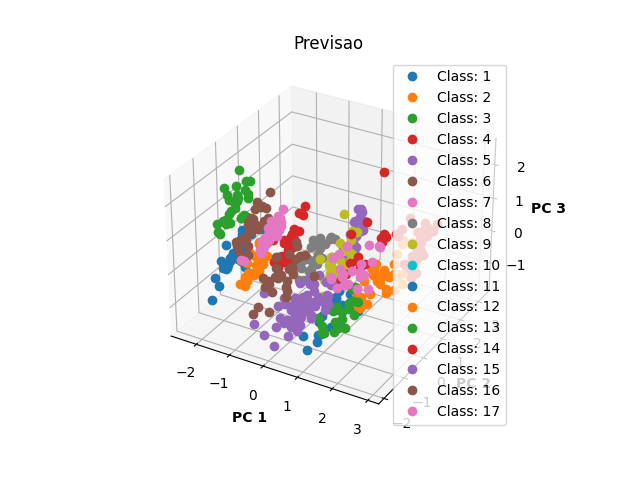

In [14]:
#Para ter a visualização top
fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
for pred in de_para.keys():
    X1_tr_filt = X1_tr_pc[y_predicted_relabel == pred,:3]
    ax.plot3D(X1_tr_filt[:,0], X1_tr_filt[:,1], X1_tr_filt[:,2], 'o', label='Class: {}'.format(pred))
    
ax.set_title("Previsao")
ax.set_xlabel('PC 1', fontweight ='bold')
ax.set_ylabel('PC 2', fontweight ='bold')
ax.set_zlabel('PC 3', fontweight ='bold')
ax.legend()

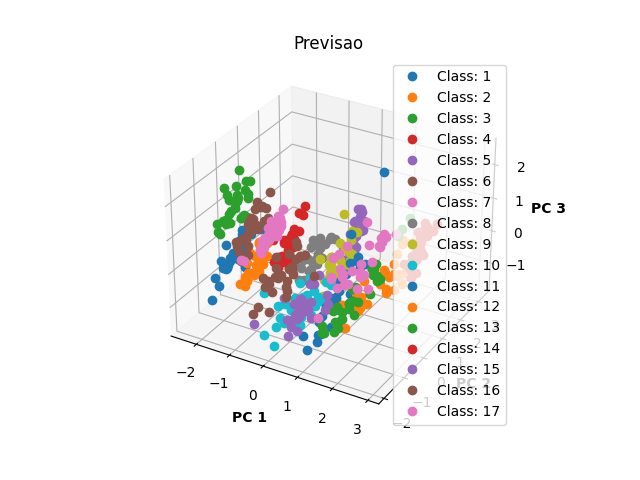

In [15]:
fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
for pred in de_para.keys():
    X1_tr_filt = X1_tr_pc[y_tr == pred,:3]
    ax.plot3D(X1_tr_filt[:,0], X1_tr_filt[:,1], X1_tr_filt[:,2], 'o', label='Class: {}'.format(pred))
ax.legend()

ax.set_title("Previsao")
ax.set_xlabel('PC 1', fontweight ='bold')
ax.set_ylabel('PC 2', fontweight ='bold')
ax.set_zlabel('PC 3', fontweight ='bold')
ax.legend()

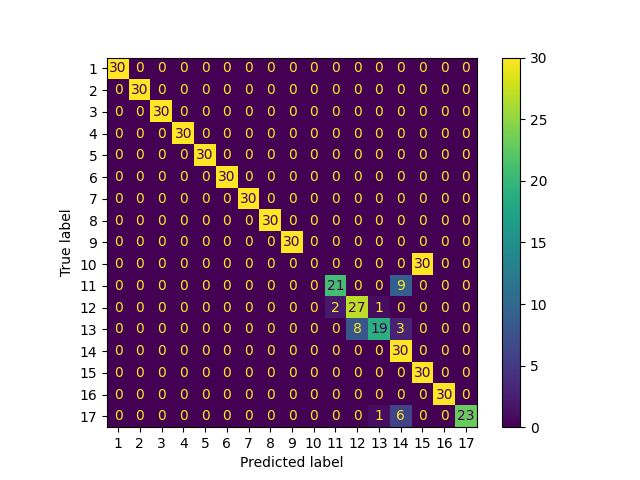

In [16]:
#Matriz de confusao
cm = confusion_matrix(y_tr, y_predicted_relabel)
cmgraph = ConfusionMatrixDisplay(cm, display_labels=de_para.keys())
cmgraph.plot()

NOTA: as classes 10 e 15 tem o mesmo gap e são falhas. Como a diferença é basicamente a presença de uma massa e esta está relativamente baixa na estrutura (no primeiro piso), acho justificável termos confundido uma com a outra

In [17]:
np.unique(y_predicted_relabel)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17],
      dtype=int32)

In [18]:
np.diag(cm).sum()/cm.sum()

0.8823529411764706

### 4.5 - Visualizando os dados com plot 3D (Falhas)

O artigo apresenta as classes entre 1 e 9 como modos de operação normais. Dessa forma, vamos usar 9 como ponto de corte para reclassificar.

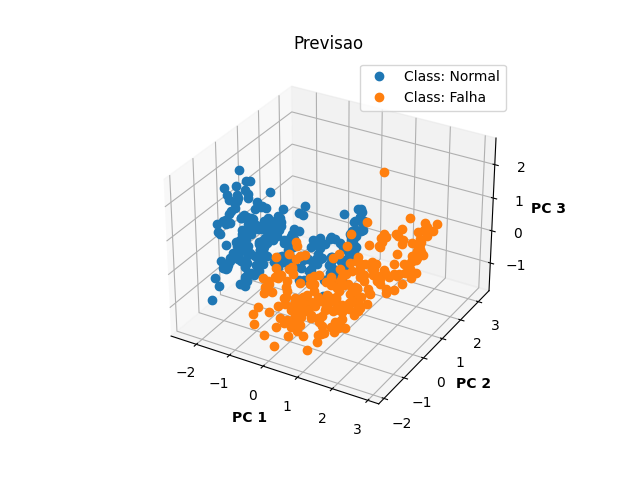

In [19]:
fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
X1_tr_filt = X1_tr_pc[y_predicted_relabel <= 9,:3]
ax.plot3D(X1_tr_filt[:,0], X1_tr_filt[:,1], X1_tr_filt[:,2], 'o', label='Class: Normal')
X1_tr_filt = X1_tr_pc[y_predicted_relabel > 9,:3]
ax.plot3D(X1_tr_filt[:,0], X1_tr_filt[:,1], X1_tr_filt[:,2], 'o', label='Class: Falha')
    
ax.set_title("Previsao")
ax.set_xlabel('PC 1', fontweight ='bold')
ax.set_ylabel('PC 2', fontweight ='bold')
ax.set_zlabel('PC 3', fontweight ='bold')
ax.legend()

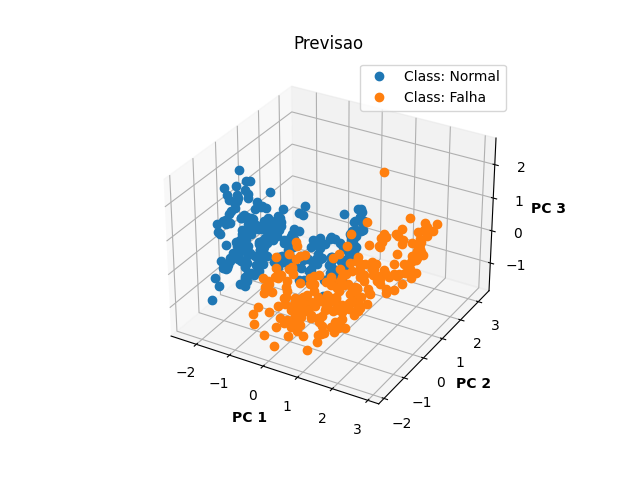

In [61]:
fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
X1_tr_filt = X1_tr_pc[y_tr <= 9,:3]
ax.plot3D(X1_tr_filt[:,0], X1_tr_filt[:,1], X1_tr_filt[:,2], 'o', label='Class: Normal')
X1_tr_filt = X1_tr_pc[y_tr > 9,:3]
ax.plot3D(X1_tr_filt[:,0], X1_tr_filt[:,1], X1_tr_filt[:,2], 'o', label='Class: Falha')
    
ax.set_title("Previsao")
ax.set_xlabel('PC 1', fontweight ='bold')
ax.set_ylabel('PC 2', fontweight ='bold')
ax.set_zlabel('PC 3', fontweight ='bold')
ax.legend()

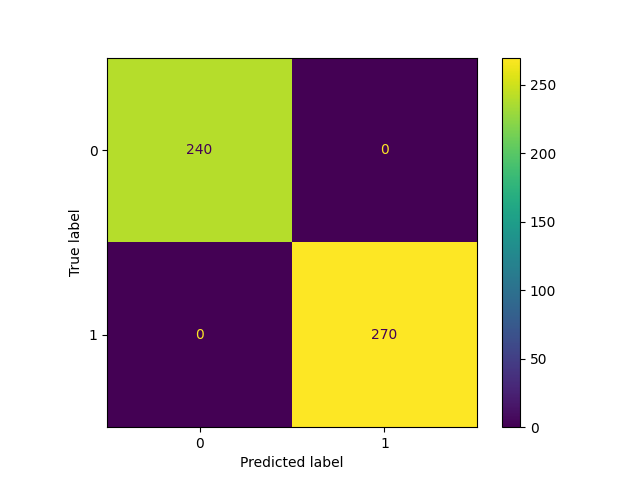

In [21]:
#Matriz de confusao
cmgraph = ConfusionMatrixDisplay(confusion_matrix(y_tr<=9, y_predicted_relabel<=9))
cmgraph.plot()

### 4.6 - Testando com apenas 2 classes

In [34]:
kmeans = KMeans(n_clusters=2, n_init=50, random_state=rs)
y_predicted = kmeans.fit_predict(X1_tr_pc)

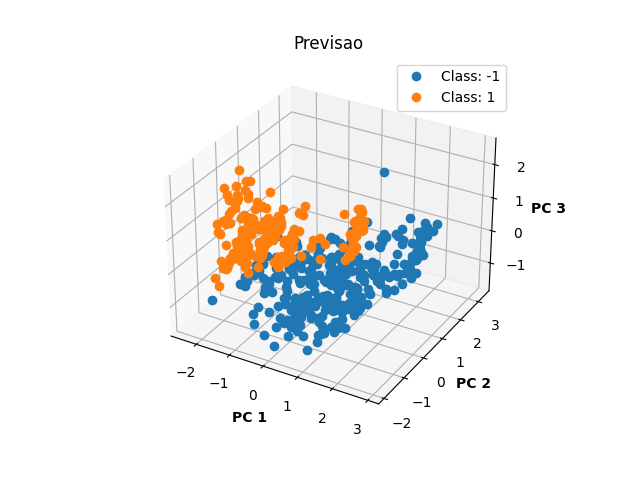

In [60]:
fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
for pred in np.unique(y_predicted):
    X1_tr_filt = X1_tr_pc[y_predicted == pred,:3]
    ax.plot3D(X1_tr_filt[:,0], X1_tr_filt[:,1], X1_tr_filt[:,2], 'o', label='Class: {}'.format(pred))
ax.legend()

ax.set_title("Previsao")
ax.set_xlabel('PC 1', fontweight ='bold')
ax.set_ylabel('PC 2', fontweight ='bold')
ax.set_zlabel('PC 3', fontweight ='bold')
ax.legend()

In [68]:
de_para = {}
filt = {}
for pred in np.unique(y_tr<=9):
    moda = stats.mode(y_predicted[(y_tr<=9) == pred])[0][0]
    de_para[pred] = moda
    filt[pred] = y_predicted == moda


y_predicted_relabel = y_predicted.copy()

for pred in de_para.keys():
    y_predicted_relabel[filt[pred]] = pred
    
de_para

{False: -1, True: 1}

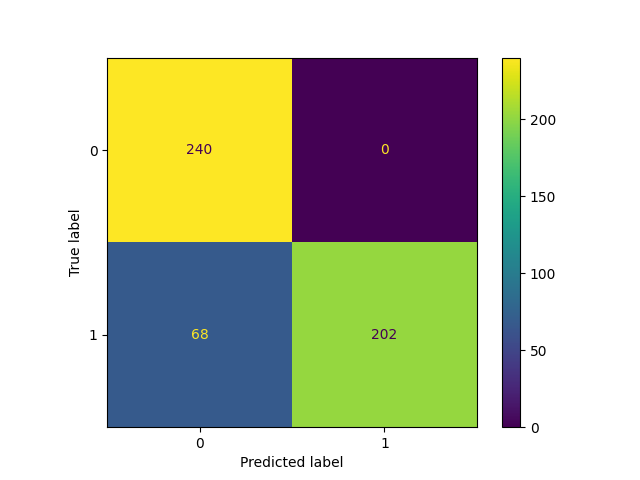

In [69]:
#Matriz de confusao
cmgraph = ConfusionMatrixDisplay(confusion_matrix(y_tr<=9, y_predicted_relabel))
cmgraph.plot()

NOTA: Repare que ele já começou a separar mal as classes!

## Passo 5 - Aplicando a t-SNE

### 5.1 - Transformando nosso vetor

In [22]:
tsne = TSNE(n_components=3)

X1_tr_tn = tsne.fit_transform(X1_tr)
#X1_te_tn = tsne.transform(X1_te)

### 5.2 - Plotando 3D (17 classes)

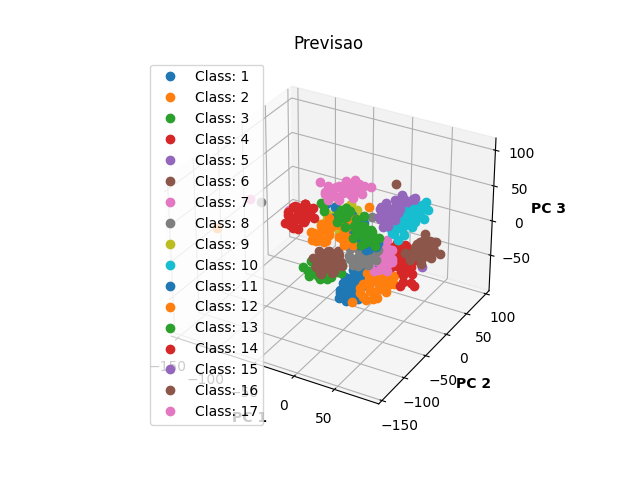

In [23]:
fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
for pred in de_para.keys():
    X1_tr_filt = X1_tr_tn[y_tr == pred,:3]
    ax.plot3D(X1_tr_filt[:,0], X1_tr_filt[:,1], X1_tr_filt[:,2], 'o', label='Class: {}'.format(pred))
ax.legend()

ax.set_title("Previsao")
ax.set_xlabel('PC 1', fontweight ='bold')
ax.set_ylabel('PC 2', fontweight ='bold')
ax.set_zlabel('PC 3', fontweight ='bold')
ax.legend()

### 5.3 - Comparando com o PCA (Plotando 2D)

Text(0, 0.5, 'PC 2')

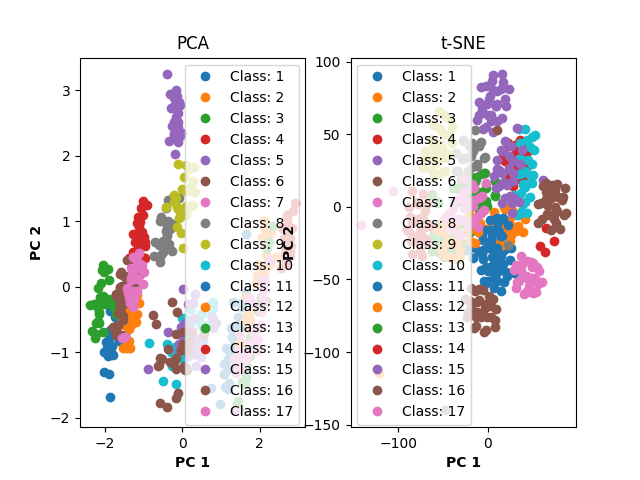

In [24]:
fig, axs = plt.subplots(1,2)

ax = axs[0]
for pred in de_para.keys():
    X1_tr_filt = X1_tr_pc[y_tr == pred,:3]
    ax.plot(X1_tr_filt[:,0], X1_tr_filt[:,1], 'o', label='Class: {}'.format(pred))
ax.legend()

ax.set_title("PCA")
ax.set_xlabel('PC 1', fontweight ='bold')
ax.set_ylabel('PC 2', fontweight ='bold')
#ax.legend()

ax = axs[1]
for pred in de_para.keys():
    X1_tr_filt = X1_tr_tn[y_tr == pred,:3]
    ax.plot(X1_tr_filt[:,0], X1_tr_filt[:,1], 'o', label='Class: {}'.format(pred))
ax.legend()

ax.set_title("t-SNE")
ax.set_xlabel('PC 1', fontweight ='bold')
ax.set_ylabel('PC 2', fontweight ='bold')
#ax.legend()

### 5.2 - Plotando 3D (Falha e Não-falha)

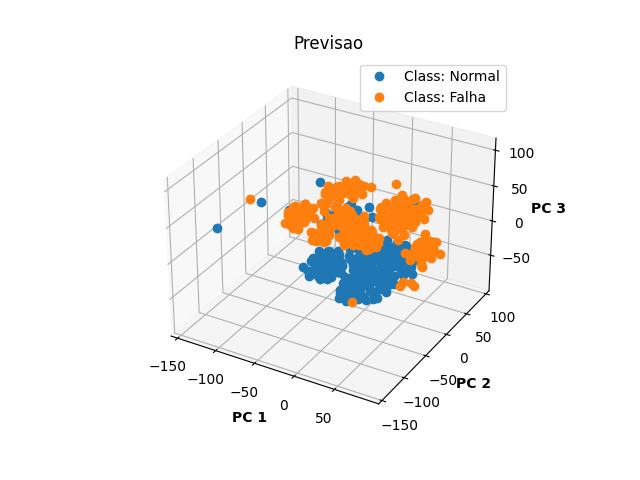

In [25]:
fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
X1_tr_filt = X1_tr_tn[y_predicted_relabel <= 9,:3]
ax.plot3D(X1_tr_filt[:,0], X1_tr_filt[:,1], X1_tr_filt[:,2], 'o', label='Class: Normal')
X1_tr_filt = X1_tr_tn[y_predicted_relabel > 9,:3]
ax.plot3D(X1_tr_filt[:,0], X1_tr_filt[:,1], X1_tr_filt[:,2], 'o', label='Class: Falha')
    
ax.set_title("Previsao")
ax.set_xlabel('PC 1', fontweight ='bold')
ax.set_ylabel('PC 2', fontweight ='bold')
ax.set_zlabel('PC 3', fontweight ='bold')
ax.legend()

## Passo 6 - Criando um OneClassSVM para nosso problema

In [62]:
#Importante. Ele detecta Outilers NO CONJUNTO!
ocsvm = OneClassSVM(kernel='linear')
ocsvm = ocsvm.fit(X1_tr_pc[:,:2])
y_predicted = ocsvm.predict(X1_tr_pc[:,:2])

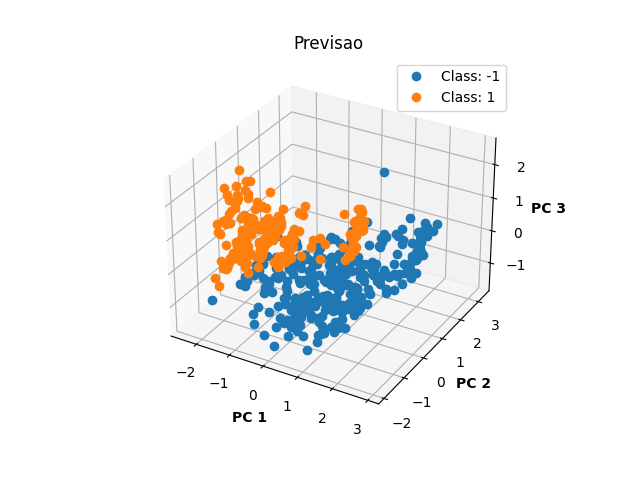

In [63]:
fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
for pred in np.unique(y_predicted):
    X1_tr_filt = X1_tr_pc[y_predicted == pred,:3]
    ax.plot3D(X1_tr_filt[:,0], X1_tr_filt[:,1], X1_tr_filt[:,2], 'o', label='Class: {}'.format(pred))
ax.legend()

ax.set_title("Previsao")
ax.set_xlabel('PC 1', fontweight ='bold')
ax.set_ylabel('PC 2', fontweight ='bold')
ax.set_zlabel('PC 3', fontweight ='bold')
ax.legend()

In [66]:
de_para = {}
filt = {}
for pred in np.unique(y_tr<=9):
    moda = stats.mode(y_predicted[(y_tr<=9) == pred])[0][0]
    de_para[pred] = moda
    filt[pred] = y_predicted == moda


y_predicted_relabel = y_predicted.copy()

for pred in de_para.keys():
    y_predicted_relabel[filt[pred]] = pred
    
de_para

{False: -1, True: 1}

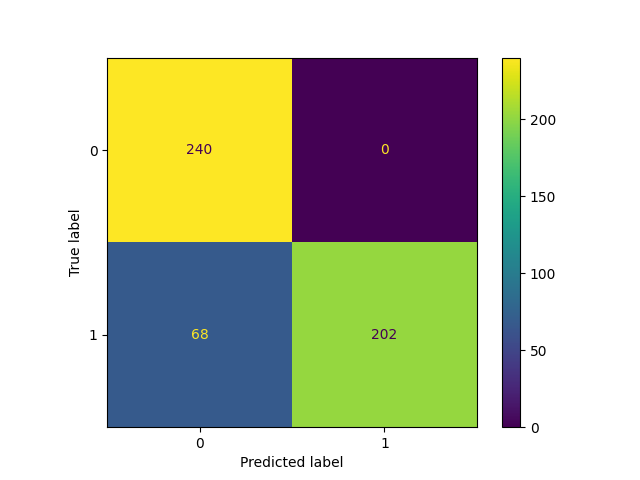

In [67]:
#Matriz de confusao
cmgraph = ConfusionMatrixDisplay(confusion_matrix(y_tr<=9, y_predicted_relabel))
cmgraph.plot()